In [16]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore') 

In [185]:
'''import data as df'''
df = pd.read_csv('data/tokens.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.fillna(" ")

In [186]:
df

,exam,findings,clinicaldata,impression
0,exam chest radiography exam date clinical hist...,finding mild pulmonary vascular congestion sim...,clinical history hypoxia,impression mild pulmonary vascular congestion ...
1,procedure chest comparison none indication acu...,finding lung normal significant pulmonary pare...,indication acute onset cough three week surger...,conclusion normal examination
2,exam chest view history chest pain technique i...,finding confluent infiltrates pleural effusion...,history chest pain,impression acute cardiopulmonary abnormality e...
3,exam chest radiography exam date clinical hist...,finding focal opacity evident pleural effusion...,clinical history chest pain,impression normal single view chest
4,exam chest radiography exam date clinical hist...,finding focal opacity evident pleural effusion...,clinical history shortness breath,impression normal single view chest
...,...,...,...,...
982,exam chest history acute respiratory illness t...,finding support device unchanged cardiomediast...,history acute respiratory illness,impression acute cardiopulmonary process dicta...
983,exam chest view history chest pain comparison ...,finding lung clear heart size within normal limit,history chest pain,impression acute finding electronically signed...
984,exam chest radiography exam date clinical hist...,finding focal opacity evident pleural effusion...,clinical history chest pain,impression normal single view chest
985,exam chest radiography exam date clinical hist...,finding focal opacity evident pleural effusion...,clinical history cough,impression normal chest radiography


In [187]:
'''create dataframe of each report, cleaned and tokenized, and its label'''
exams = list(df['exam'].values)
findings = list(df['findings'].values)
clinicaldata = list(df['clinicaldata'].values)
impression = list(df['impression'].values)

texts = exams + findings + clinicaldata + impression
labels = ['exam'] * len(exams) + ['findings'] * len(findings) + ['clinicaldata'] * len(clinicaldata) + ['impression'] * len(impression)

In [188]:
reports = pd.DataFrame({'text': texts, 'label': labels})

In [189]:
reports

,text,label
0,exam chest radiography exam date clinical hist...,exam
1,procedure chest comparison none indication acu...,exam
2,exam chest view history chest pain technique i...,exam
3,exam chest radiography exam date clinical hist...,exam
4,exam chest radiography exam date clinical hist...,exam
...,...,...
3943,impression acute cardiopulmonary process dicta...,impression
3944,impression acute finding electronically signed...,impression
3945,impression normal single view chest,impression
3946,impression normal chest radiography,impression


<Figure size 432x432 with 0 Axes>

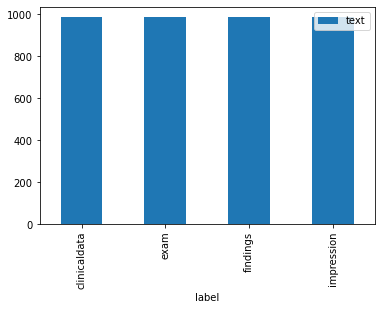

In [22]:
'''visual check to make sure each field has the same number of entries'''
fig = plt.figure(figsize=(6,6))
reports.groupby('label').count().plot.bar(ylim=0)
plt.show()

In [48]:
'''create tfidf vectorizer'''
tfidf = TfidfVectorizer()

In [49]:
X = list(reports['text'])
y = reports['label'].values

In [50]:
X = tfidf.fit_transform(X)

In [ ]:
X.

In [51]:
xtest, xtrain, ytest, ytrain = train_test_split(X, y, test_size=0.20, 
                                                random_state=42, stratify=labels)

In [52]:
logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg.fit(xtrain, ytrain)
logreg.score(xtest, ytest)

0.9905003166561115

In [265]:
logreg.coef_[0]

array([-0.03157303,  0.        , -1.0753562 ,  0.        ,  0.        ,
       -0.0412893 , -0.49579758, -1.07000772,  0.0446548 ,  0.        ,
       -0.41708906, -0.05176252,  0.        ,  0.        , -0.06243712,
       -0.15276178,  0.45404308,  0.        , -0.08172079, -0.15153422,
       -0.22114142, -0.10771986,  0.        , -0.01809352,  0.25007654,
       -0.04786902,  0.        , -0.06130079, -0.02180769, -0.08555965,
       -0.02173062, -0.07125826, -0.05958905, -0.04507404,  0.        ,
       -0.04371606, -0.34035313, -0.06890838, -0.0264801 , -0.20668245,
        0.        , -0.07594173, -0.01513224, -0.06902702, -0.12338142,
       -0.02464578, -0.08698579,  0.        ,  0.        , -0.03929468,
       -0.03026448,  0.        ,  0.        ,  0.        , -0.02473886,
        0.        ,  0.16716051, -0.0193916 , -0.12093738, -0.53923295,
       -0.05829871, -0.02716161, -0.02217719, -0.03470146, -0.03218559,
       -0.03201777, -0.06716233, -0.03013207, -0.21399299, -0.15

array([[788,   0,   1,   0],
       [  0, 772,  10,   8],
       [  0,   2, 786,   1],
       [  1,   0,   7, 782]])

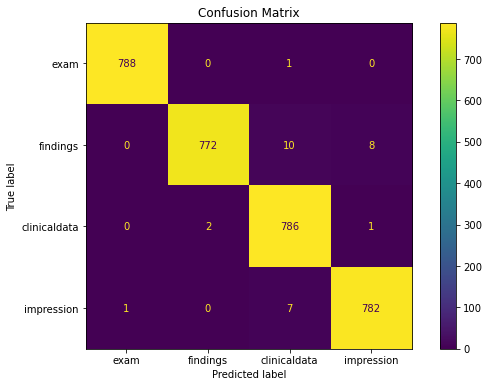

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Confusion Matrix")
display = plot_confusion_matrix(logreg, xtest, ytest, 
                                display_labels=df.columns,
                                ax=ax)
display.confusion_matrix

In [54]:
print(classification_report(ytest, logreg.predict(xtest)))

              precision    recall  f1-score   support

clinicaldata       1.00      1.00      1.00       789
        exam       1.00      0.98      0.99       790
    findings       0.98      1.00      0.99       789
  impression       0.99      0.99      0.99       790

    accuracy                           0.99      3158
   macro avg       0.99      0.99      0.99      3158
weighted avg       0.99      0.99      0.99      3158



In [190]:
errors = pd.DataFrame({'guess': logreg.predict(xtest), 'truth': ytest})
errors = errors.query('guess != truth')
errors['text'] = reports['text']
errors['text'] = errors['text'].str.split()

In [249]:
grouped = errors.groupby(['guess'])['text'].apply(list)
fields = list(grouped.index)
words = {}
for field in fields:
    words[field] = sum(grouped[field], [])   

In [250]:
reports = pd.DataFrame({'text': texts, 'label': labels})
reports['text'] = reports['text'].str.split()
for field in fields:
    stopwords = [count[0] for count in Counter(words[field]).most_common(2)]
    reports['text'] = reports['text'].apply(lambda row: remove_stopwords(row, stopwords))
reports['text'] = reports['text'].apply(lambda row: join_words(row))

In [251]:
def join_words(row):
    return ' '.join(word for word in row)
def remove_stopwords(row, stopwords):
    return [word for word in row if word not in stopwords]

In [252]:
X = list(reports['text'])
y = reports['label'].values
X = tfidf.fit_transform(X)
xtest, xtrain, ytest, ytrain = train_test_split(X, y, test_size=0.20, 
                                                random_state=42, stratify=labels)
logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg.fit(xtrain, ytrain)
logreg.score(xtest, ytest)

0.987017099430019

In [264]:
errors

,guess,truth,text
306,impression,findings,"[chest, view, clinical, history, year, old, ma..."
547,findings,clinicaldata,"[exam, chest, radiography, exam, date, clinica..."
661,exam,findings,"[exam, chest, radiography, exam, date, clinica..."
802,exam,findings,"[exam, chest, radiography, exam, date, clinica..."
834,findings,impression,"[exam, chest, radiography, exam, date, clinica..."
939,findings,impression,"[procedure, chest, comparison, chest, performe..."
966,findings,exam,"[exam, chest, history, chest, pain, technique,..."
1025,findings,exam,"[finding, focal, opacity, evident, pleural, ef..."
1247,impression,exam,"[finding, support, line, tube, including, trac..."
1374,impression,exam,"[finding, right, mediport, unchanged, position..."


array([[788,   0,   1,   0],
       [  2, 768,  13,   7],
       [  1,   3, 783,   2],
       [  1,   0,  11, 778]])

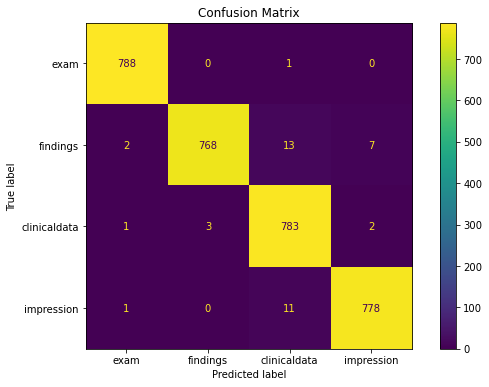

In [248]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Confusion Matrix")
display = plot_confusion_matrix(logreg, xtest, ytest, 
                                display_labels=df.columns,
                                ax=ax)
display.confusion_matrix

In [221]:
print(classification_report(ytest, logreg.predict(xtest)))

              precision    recall  f1-score   support

clinicaldata       0.99      1.00      1.00       789
        exam       1.00      0.97      0.98       790
    findings       0.97      0.99      0.98       789
  impression       0.99      0.98      0.99       790

    accuracy                           0.99      3158
   macro avg       0.99      0.99      0.99      3158
weighted avg       0.99      0.99      0.99      3158



In [260]:
clinical = errors['guess'] == 'clinicaldata'

In [262]:
errors

,guess,truth,text
306,impression,findings,"[chest, view, clinical, history, year, old, ma..."
547,findings,clinicaldata,"[exam, chest, radiography, exam, date, clinica..."
661,exam,findings,"[exam, chest, radiography, exam, date, clinica..."
802,exam,findings,"[exam, chest, radiography, exam, date, clinica..."
834,findings,impression,"[exam, chest, radiography, exam, date, clinica..."
939,findings,impression,"[procedure, chest, comparison, chest, performe..."
966,findings,exam,"[exam, chest, history, chest, pain, technique,..."
1025,findings,exam,"[finding, focal, opacity, evident, pleural, ef..."
1247,impression,exam,"[finding, support, line, tube, including, trac..."
1374,impression,exam,"[finding, right, mediport, unchanged, position..."
